### Setup

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', 100) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import missingno as msno

import scipy.stats as st

from os import path
import pickle

import datetime

import sys
sys.path.append('..')
import src.functions.my_functions as my_func

In [4]:
from imp import reload
reload(my_func)

<module 'src.functions.my_functions' from '..\\src\\functions\\my_functions.py'>

### Load Data

In [5]:
f = 'loan.p'
d = ['..','data','raw']
fp = path.join(*d,f)

with open(fp, 'rb') as file:
    data = pickle.load(file)

In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(887379, 74)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
loan_status  

In [9]:
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51457
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761350
purpose                             0
title                             151
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [10]:
msno_mat_all = msno.matrix(data, labels=True, inline=False)

for label in msno_mat_all.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')

my_func.saveplot(msno_mat_all, 'EDA_msno_matrix_full')
plt.close()

![](../reports/figures/EDA_msno_matrix_full.png)

It is evident that are a signficiant portions of data missing, which will need to be addressed during data cleaning / preperation.

### Attribute Info

The following column descriptions were provided by Lending Club

##### Borrower Info
- addr_state: The state provided by the borrower in the loan application (categorical: 2 char state code)
- annual_inc: The self-reported annual income provided by the borrower during registration (numeric)
- annual_inc_joint: The combined self-reported annual income provided by the co-borrowers during registration (numeric)
- emp_length: Employment length in years (categorical: ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years' , '9 years', '10+ years'])
- emp_title: The job title supplied by the Borrower when applying for the loan (text)
- home_ownership: The home ownership status provided by the borrower during registration. (categorical: ['RENT', 'OWN', 'MORTGAGE', 'OTHER'])
- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified (categorical: ['Verified', 'Source Verified', 'Not Verified'])
- member_id: A unique LC assigned Id for the borrower member (numeric)
- verification_status_joint: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified (categorical: ['NaN', 'Verified', 'Source Verified', 'Not Verified'])
- zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application (categorical/text)

##### Loan Info
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers (categorical: ['INDIVIDUAL', 'JOINT'])
- collection_recovery_fee: Post charge off collection fee (numeric)
- desc: Loan description provided by the borrower (text)
- grade: LC assigned loan grade (categorical: ['A',' B', 'C', 'D', 'E', 'F', 'G'])
- id: A unique LC assigned ID for the loan listing (numeric)
- initial_list_status: The initial listing status of the loan (categorical: ['W', 'F'])
- issue_d: The month which the loan was funded (date)
- last_credit_pull_d: The most recent month LC pulled credit for this loan (date)
- loan_status: Current status of the loan (categorical: ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Issued'])
- policy_code: publicly available policy_code=1; new products not publicly available policy_code=2 (categorical: ['1', '2'])
- purpose: A category provided by the borrower for the loan request (categorical: ['credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational'])
- sub_grade: LC assigned loan subgrade (categorical: ['A1', 'A2', ..., 'G4', 'G5'])
- title: The loan title provided by the borrower (text)
- url: URL for the LC page with listing data (text)

##### Loan Finances
- funded_amnt: The total amount committed to that loan at that point in time (numeric)
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time. (numeric)
- installment: The monthly payment owed by the borrower if the loan originates (numeric)
- int_rate:	Interest Rate on the loan (numeric)
- last_pymnt_amnt: Last total payment amount received (numeric)
- last_pymnt_d:	Last month payment was received (date)
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value (numeric)
- next_pymnt_d:	Next scheduled payment date (date)
- out_prncp: Remaining outstanding principal for total amount funded (numeric)
- out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors (numeric)
- pymnt_plan: Indicates if a payment plan has been put in place for the loan (categorical: ['y', 'n'])
- recoveries: post charge-off gross recovery (numeric)
- term: The number of payments on the loan. Values are in months and can be either 36 or 60 (categorical: ['36', '60'])
- total_pymnt: Payments received to date for total amount funded (numeric)
- total_pymnt_inv: Payments received to date for portion of total amount funded by investors (numeric)
- total_rec_int: Interest received to date (numeric)
- total_rec_late_fee: Late fees received to date (numeric)
- total_rec_prncp: Principal received to date (numeric)

##### Borrower Credit History
- collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections (numeric)
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years (numeric)
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage  and the requested LC loan, divided by the borrower’s self-reported monthly income. (numeric)
- dti_joint: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income (numeric)
- earliest_cr_line:	The month the borrower's earliest reported credit line was opened (date)
- fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) (numeric)
- last_fico_range_high	The upper boundary range the borrower’s last FICO pulled belongs to (MISSING)
- last_fico_range_low	The lower boundary range the borrower’s last FICO pulled belongs to (MISSING)
- mths_since_last_delinq: The number of months since the borrower's last delinquency (numeric)
- mths_since_last_major_derog: Months since most recent 90-day or worse rating (numeric)
- mths_since_last_record: The number of months since the last public record (numeric)
- open_acc:	The number of open credit lines in the borrower's credit file. (numeric)
- pub_rec: Number of derogatory public records (numeric)
- revol_bal: Total credit revolving balance (numeric)
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (numeric)
- total_acc: The total number of credit lines currently in the borrower's credit file (numeric)
- open_acc_6m: Number of open trades in last 6 months (numeric)
- open_il_6m: Number of currently active installment trades (numeric)
- open_il_12m: Number of installment accounts opened in past 12 months (numeric)
- open_il_24m: Number of installment accounts opened in past 24 months (numeric)
- mths_since_rcnt_il: Months since most recent installment accounts opened (numeric)
- total_bal_il:	Total current balance of all installment accounts (numeric)
- il_util: Ratio of total current balance to high credit/credit limit on all install acct (numeric)
- open_rv_12m: Number of revolving trades opened in past 12 months (numeric)
- open_rv_24m: Number of revolving trades opened in past 24 months (numeric)
- max_bal_bc: Maximum current balance owed on all revolving accounts (numeric)
- all_util: Balance to credit limit on all trades (numeric)
- total_rev_hi_lim:	Total revolving high credit/credit limit (numeric)
- inq_fi: Number of personal finance inquiries (numeric)
- total_cu_tl: Number of finance trades (numeric)
- inq_last_12m:	Number of credit inquiries in past 12 months (numeric)
- acc_now_delinq: The number of accounts on which the borrower is now delinquent (numeric)
- tot_coll_amt: Total collection amounts ever owed (numeric)
- tot_cur_bal: Total current balance of all accounts (numeric)

### Exploring Loan Status

For the purposes of classification, the loan status is the our attribute of interest. Specifically, we are interested in those loans that are default vs. fully paid. Taking a quick look at the distribution of loans across the various loan statuses:

In [10]:
plt.figure(figsize=(15,7))

ax = sns.countplot(data['loan_status'])

plt.title('Count per Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

for l in ax.get_xticklabels():
    l.set_rotation(45)
    l.set_horizontalalignment('right')

my_func.saveplot(plt, 'EDA_LoanStatusCount_All')
plt.close()

![](../reports/figures/EDA_LoanStatusCount_All.png)

The majority of data are current loans. However, for the purposes of our classification analysis we are only concerned with loans that have reached completion:

In [11]:
# Ignore loans w/ status Current, In Grace Period, Issued, and Late
current_loan_mask = data['loan_status'].str.contains('Current|Grace|Issued|Late')

In [12]:
current_loan_mask.sum() / data.shape[0]

0.71045179117378254

In [13]:
data[~current_loan_mask].shape[0]

256939

In [14]:
# Ignore loans w/ status Current, In Grace Period, Issued, and Late
current_loan_mask = data['loan_status'].str.contains('Current|Grace|Issued|Late')

plt.figure(figsize=(15,7))

ax = sns.countplot(data[~current_loan_mask]['loan_status'])

plt.title('Count per Loan Status (Completed Loans)')
plt.xlabel('Loan Status')
plt.ylabel('Count')

for l in ax.get_xticklabels():
    l.set_rotation(45)
    l.set_horizontalalignment('right')
    
my_func.saveplot(plt, 'EDA_LoanStatusCount_Complete')
plt.close()

![](../reports/figures/EDA_LoanStatusCount_Complete.png)

Note that Late, although technically current, have not yet been discarded. Whilst 'Charged Off' and 'Default' loan statuses are the only true default statuses, it may be worth exploring the benefit of including 'Late' loans in our definition of default to expand the amount of data available. However, this will expectedly come at the cost of some accuracy since many loans that are late in payment may very well still be fully paid off.

Also worth noting are the two out-of-policy loan statuses. For the sake of simplicity, these should likely be merged with their respective 'Fully Paid' and 'Charged Off' statuses.

We will add a new column for a basic default status to aid in further analysis (this process will need to be repeated during official data cleaning & preperatin):

In [14]:
import re

def default_status(loan_status):

    s = re.compile('Charged|Default')
    
    if re.search(s, loan_status):
        default = 1
    else:
        default = 0
        
    return default

In [15]:
data['default'] = data['loan_status'].apply(default_status)

In [18]:
# Check new status
data[['loan_status', 'default']].head(10)

,loan_status,default
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
5,Fully Paid,0
6,Current,0
7,Fully Paid,0
8,Charged Off,1
9,Charged Off,1


With the new default stasues in place, we will take a look at the proportions of defualted loans for each definition:

In [35]:
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(data[(~current_loan_mask)]['default'], ax=ax) # Exclude late loans when considering plain default status
ax.set_title('Fully Paid vs. Defaulted Loans')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
ax.set_xticklabels(['Fully Paid', 'Defaulted'])

my_func.saveplot(fig, 'EDA_DefaultLoanCounts')
plt.close()

![](../reports/figures/EDA_DefaultLoanCounts.png)

In [17]:
p_default = data[(~current_loan_mask)]['default'].sum() / data[(~current_loan_mask)].shape[0]

print('% Default Loans = {:.1f}'.format(100*p_default))

% Default Loans = 18.4


Defaulted loans are clearly in the minority.

Next, we will take a quick look at the correlations of numerical features with our new default status to see if anything stands out immediately:

In [37]:
data[(~current_loan_mask)].corr()['default'].sort_values(ascending=False)

default                        1.000000
recoveries                     0.445846
collection_recovery_fee        0.305031
int_rate                       0.239584
total_rec_late_fee             0.147956
out_prncp                      0.121888
out_prncp_inv                  0.121886
dti                            0.112233
revol_util                     0.096587
inq_last_6mths                 0.062153
loan_amnt                      0.056605
funded_amnt                    0.056409
funded_amnt_inv                0.053161
total_rec_int                  0.045058
installment                    0.042557
mths_since_last_record         0.024164
delinq_2yrs                    0.017466
open_acc                       0.010617
collections_12_mths_ex_med     0.007774
acc_now_delinq                 0.006041
pub_rec                        0.003506
tot_coll_amt                  -0.001607
revol_bal                     -0.002653
mths_since_last_major_derog   -0.016309
mths_since_last_delinq        -0.021143


There are a few features with correlations > 0.3 in which the relationship may be worth exploring further. However it is important to note that we need to eliminate features that capture information we would not know at the time a loan application is submitted (e.g. the number of recoveries, total payment, etc.). These cannot be used in our classification analysis since we are trying to provide guidance at the time of investing versus simply identifying default loans after the fact.

The following columns, based off their descriptions, have been immediately indentified as 'future knowledge' features:

In [38]:
future_cols = ['recoveries', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv', 'total_rec_int',
               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'total_rec_prncp']

As for the other columns which track balances, utilization, etc., the assumption is currently made that these values are a snapshot of the borrower's situation at the time the loan was instantiated. We will investigate the validity of this assumption when we explore these features individually. 

One important feature that is missing from the correlations above is the loan grade and subgrade, which is currently represented as a categorical letter/number combination. Converting these grades into a numerical scale should hopefully show some connection between a loan's grade and default status:

In [16]:
# Create mapping functions to return numeric value for a grade...

def grade_val(grade, grade_map=None):
    if grade_map is None:
        # A = 0, B = 1, ..., G = 6
        grade_map = {c: i for i, c in enumerate('ABCDEFG')}
    
    try:
        val = grade_map[grade]
    except:
        val = np.NaN
    
    return val

def subgrade_val(subgrade, subgrade_map=None):
    if subgrade_map is None:
        # A1 = 1, A2 = 2, ..., G4 = 64, G5 = 65
        subgrade_map = {sg: grade_dict[sg[0]]*10 + int(sg[1]) for sg in [c + str(i) for c in 'ABCDEFG' for i in range(1,6)]}
    
    try:
        val = subgrade_map[subgrade]
    except:
        val = np.NaN
        
    return val

In [17]:
grade_map = {c: i for i, c in enumerate('ABCDEFG')}
subgrade_map = {sg: grade_map[sg[0]]*10 + int(sg[1]) for sg in [c + str(i) for c in 'ABCDEFG' for i in range(1,6)]}

data['grade_value'] = data['grade'].apply(lambda x: grade_val(x, grade_map))
data['subgrade_value'] = data['sub_grade'].apply(lambda x: subgrade_val(x, subgrade_map))

In [41]:
data.drop(future_cols, axis=1)[(~current_loan_mask)].corr()['default'].sort_values(ascending=False)

default                        1.000000
collection_recovery_fee        0.305031
int_rate                       0.239584
subgrade_value                 0.233135
grade_value                    0.229195
dti                            0.112233
revol_util                     0.096587
inq_last_6mths                 0.062153
loan_amnt                      0.056605
funded_amnt                    0.056409
funded_amnt_inv                0.053161
installment                    0.042557
mths_since_last_record         0.024164
delinq_2yrs                    0.017466
open_acc                       0.010617
collections_12_mths_ex_med     0.007774
acc_now_delinq                 0.006041
pub_rec                        0.003506
tot_coll_amt                  -0.001607
revol_bal                     -0.002653
mths_since_last_major_derog   -0.016309
mths_since_last_delinq        -0.021143
member_id                     -0.030336
id                            -0.032000
total_acc                     -0.032847


The numerical representations of grade and subgrade have added some relatively strong features with correlations of approx. 0.23 to 0.24

### Exploring Annual Income

Whilst not the most signficant feature in terms of correlation with default status, one of the basic factors when applying for and evaluating credit is the applicants income, so we will begin with exploring this attribute. During data cleaning, a new column was created ('annual_inc_merged') to combine the values of individual and joint applications, and will focus on this value versus the plain 'annual_inc' during analysis. The justification behind this decision is that joint borrowers should be represented by the joint properties versus those of one of the individuals, since all members are liable and capable of contributing to the payment of the loan.

In [91]:
# Function to summarize/visualize a given dataframe column
def attr_summary(attr, whis=1.5):
    
    attr = attr.dropna()
    
    fig, axs = plt.subplots(2,2, figsize=(15,10))

    sns.boxplot(attr, ax=axs[0][0], whis=whis)
    sns.boxplot(attr, showfliers=False, ax=axs[0][1], whis=whis)
    
    xlim_with = axs[0][0].get_xlim()
    xlim_without = axs[0][1].get_xlim()

    sns.distplot(attr, bins=20, ax=axs[1][0])
    axs[1][0].set_xlim(xlim_with)
    
    # Filter out values below/above specified ranges
    q1, q3 = np.percentile(attr, [25,75])
    iqr = q3-q1
    low = q1 - whis*iqr
    high = q3 + whis*iqr
    
    outlier_mask = (attr > low) & (attr < high)
    sns.distplot(attr[outlier_mask], bins=20, ax=axs[1][1])
    axs[1][1].set_xlim(xlim_without)
    
    axs[0][0].set_title('With Outliers')
    axs[0][1].set_title('Without Outliers')
    plt.suptitle('Summary: {}'.format(attr.name))
    
    plt.show()
    
    print('-'*50)
    print('# High Outliers = {}'.format((attr >= high).sum()))
    print('# Low Outliers = {}'.format((attr <= low).sum()))
    
    print('-'*50)
    print('w/ Outliers:')
    print('skew = {:.3f}, kurtosis = {:.3f}'.format(st.skew(attr),st.kurtosis(attr)))
    print('w/o Outliers:')
    print('skew = {:.3f}, kurtosis = {:.3f}'.format(st.skew(attr[outlier_mask]),st.kurtosis(attr[outlier_mask])))
    
    # Print pd.DataFrame.describe() items for both versions
    print('-'*50)
    fmt = '{:<5}{:>15}{:>15}'
    print(fmt.format('Stat', 'w/ Outliers', 'w/o Outliers'))
    fmt = '{:<5}{:>15.2f}{:>15.2f}'
    for a, b in zip(attr.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).items(),
                    attr[outlier_mask].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).items()):
        print(fmt.format(a[0], a[1], b[1]))
    print('-'*50)
    
    return fig

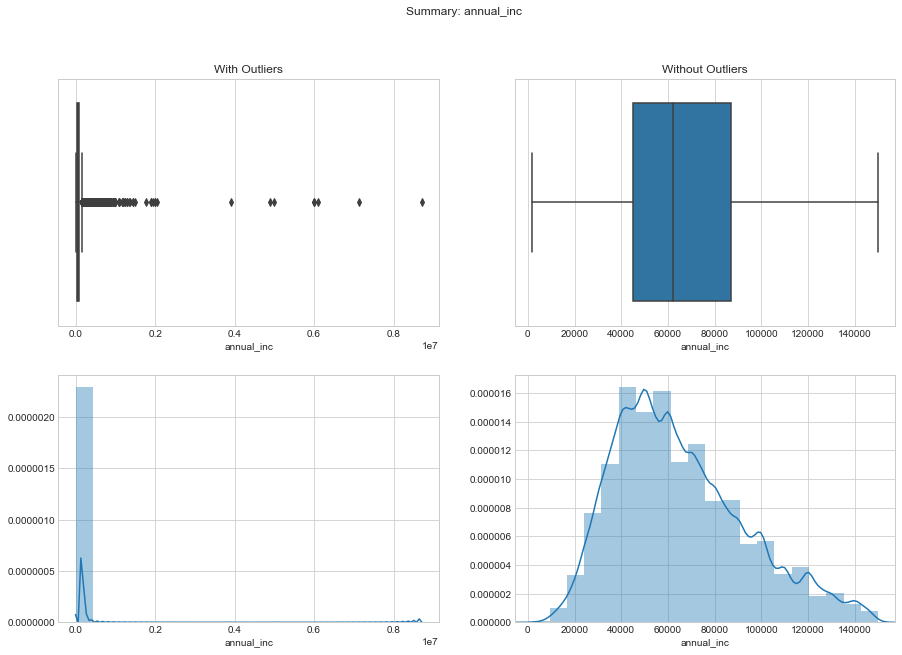

--------------------------------------------------
# High Outliers = 12773
# Low Outliers = 0
--------------------------------------------------
w/ Outliers:
skew = 40.208, kurtosis = 4321.989
w/o Outliers:
skew = 0.659, kurtosis = -0.081
--------------------------------------------------
Stat     w/ Outliers   w/o Outliers
count      256935.00      244162.00
mean        72498.85       65067.50
std         58900.43       28030.13
min          1896.00        1896.00
5%          27600.00       27000.00
25%         45000.00       44000.00
50%         62000.00       60000.00
75%         87000.00       82000.00
95%        148741.20      120000.00
max       8706582.00      149981.00
--------------------------------------------------


In [54]:
f = attr_summary(data[~current_loan_mask]['annual_inc'])

In [56]:
my_func.saveplot(f, 'EDA_AttrSummary_AnnualInc')

From the above results, we can see that without removing the high-end incomes, the distribution has both an extreme skew and kurtosis. Consequently, it may be necessary to filter out these extreme income values and limit our modelling to a standard income range, for example \$0-\$200k. If we want to keep these higher incomes for analysis, binning via regular intervals is unlikely to yield useful results due to the sparsity of data in the higher income ranges. However, binning via quantiles should yield a more uniform distribution of income categories:

In [18]:
def get_qbin(val, quartiles):
    '''
    Return which of the provided quartiles the value falls in.
    '''
    for i, q in enumerate(quartiles):
        if val <= q:
            return i+1

In [19]:
# Convert incomes to respective 10th quantile
q = 0.1
q_range = np.arange(q, 1+q, q)
quantiles = data['annual_inc'].quantile(q_range)
income_q10 = data['annual_inc'].apply(lambda x: get_qbin(x, quantiles))

In [74]:
plt.figure(figsize=(15,7))

ax = sns.countplot(income_q10[~current_loan_mask])

plt.title('Count per Income 10th Quantile')
plt.xlabel('Income Quantile (10th)')
plt.ylabel('Count')

my_func.saveplot(plt, 'EDA_Income_Q10')
plt.close()

![](../reports/figures/EDA_Income_Q10.png)

In [75]:
q = 0.05
q_range = np.arange(q, 1+q, q)
quantiles = data['annual_inc'].quantile(q_range)
income_q5 = data['annual_inc'].apply(lambda x: get_qbin(x, quantiles))

In [76]:
plt.figure(figsize=(15,7))

ax = sns.countplot(income_q5[~current_loan_mask])

plt.title('Count per Income 20th Quantile')
plt.xlabel('Income Quantile (20th)')
plt.ylabel('Count')
    
my_func.saveplot(plt, 'EDA_Income_Q20')
plt.close()

![](../reports/figures/EDA_Income_Q20.png)

Splitting data into 10th quantiles seems to yield a relatively uniform distribution between categories, whilst the 20th quantile split may be a little excessive. Using this categorization of income may prove useful, and should be considered for modelling versus the original income value.

Finally, comparing the income data across the target variable:

In [79]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.violinplot(y=data[~current_loan_mask]['default'], x=data[~current_loan_mask]['annual_inc'], ax=axs[0], orient='h')
axs[0].set_title('USD Value')
axs[0].set_xlabel('Annual Income')
axs[0].set_ylabel('Loan Status')
axs[0].set_yticklabels(['Fully Paid', 'Defaulted'])

sns.violinplot(y=data[~current_loan_mask]['default'], x=income_q10[~current_loan_mask], bw=0.2, ax=axs[1], orient='h')
axs[1].set_title('10th Quantile')
axs[1].set_xlabel('Annual Income Quantile (10th)')
axs[1].set_ylabel('')
axs[1].set_yticklabels(['Fully Paid', 'Defaulted'])

plt.suptitle('Income by Loan Status')

my_func.saveplot(fig, 'EDA_IncomeDist_vs_LoanStatus')
plt.close()

![](../reports/figures/EDA_IncomeDist_vs_LoanStatus.png)

Whilst the impact may not be as profound as expected, one can at least note that the lower percentile income brackets show a slightly larger proportion of defaulted loans.

### Exploring Loan Amount

For loan amount, there are three values to explore: 'loan_amnt', 'fundend_amnt', and 'funded_amnt_inv'.

In [74]:
loan_amnt_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
data[loan_amnt_cols].sample(20)

,loan_amnt,funded_amnt,funded_amnt_inv
527107,6000.0,6000.0,6000.0
323794,15000.0,15000.0,15000.0
386364,5950.0,5950.0,5950.0
439838,6000.0,6000.0,6000.0
797355,18000.0,18000.0,18000.0
804665,5975.0,5975.0,5975.0
758858,10000.0,10000.0,10000.0
566566,13000.0,13000.0,13000.0
855296,4675.0,4675.0,4675.0
22065,2000.0,2000.0,2000.0


In [76]:
(data['funded_amnt']/data['loan_amnt']).describe()

count    887379.000000
mean          0.999286
std           0.016013
min           0.101250
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64

The vast majority of loans appear to be fully funded, and from the perspective of analyzing the returns and such this funded amount should be the value of focus versus the requested loan amount.

In [78]:
(data['funded_amnt_inv']/data['funded_amnt']).describe()

count    887379.000000
mean          0.996430
std           0.044094
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64

Similarly, we can see that the funded amount invested typically equals the funded amount. Cases where the invested amount is less are simply loans in which additional funding came later, presumeably through other parties. Distinguishing between different investors and investment amount will greatly complicate analysis, so for the sake of simplicity we will likely just focus on the regular funded amount for comparing loan amount and return.

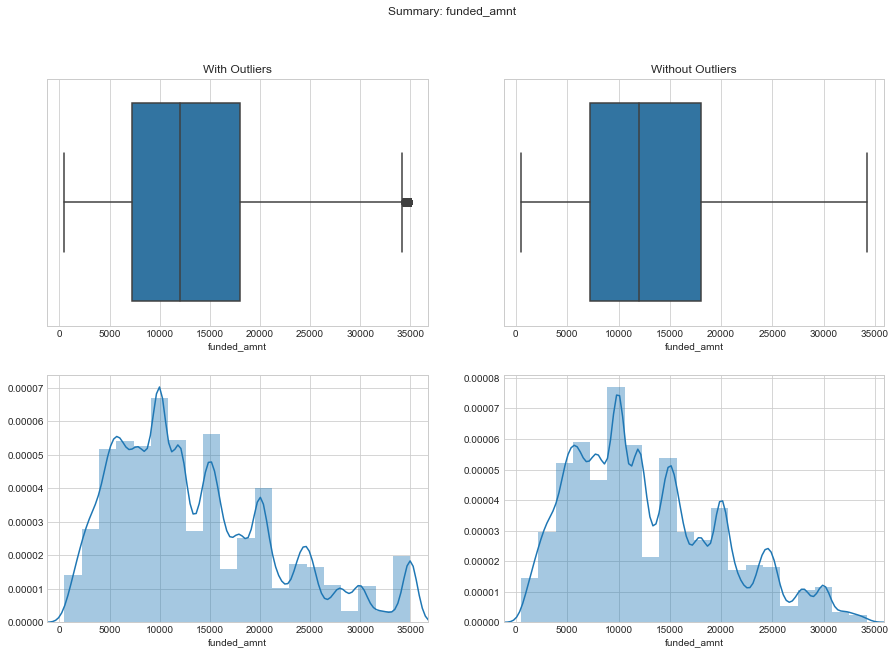

--------------------------------------------------
# High Outliers = 8194
# Low Outliers = 0
--------------------------------------------------
w/ Outliers:
skew = 0.844, kurtosis = 0.134
w/o Outliers:
skew = 0.658, kurtosis = -0.250
--------------------------------------------------
Stat     w/ Outliers   w/o Outliers
count      256939.00      248745.00
mean        13480.00       12771.49
std          8106.46        7220.70
min           500.00         500.00
5%           3000.00        3000.00
25%          7200.00        7000.00
50%         12000.00       11500.00
75%         18000.00       17625.00
95%         30000.00       27000.00
max         35000.00       34175.00
--------------------------------------------------


In [80]:
f = attr_summary(data[~current_loan_mask]['funded_amnt'])

In [81]:
my_func.saveplot(f, 'EDA_AttrSummary_FundedAmnt')

Taking a basic look at how the overall requested loan amount compares to the annual income of applicants:

In [82]:
# Mask to ignore the high outlier annual income values
inc_mask = data['annual_inc'] < 200000

In [89]:
sns.jointplot(data[inc_mask & (~current_loan_mask)]['annual_inc'], data[inc_mask & (~current_loan_mask)]['funded_amnt'], kind='hex', gridsize=15)

fig = plt.gcf()
fig.set_size_inches(8,8)
fig.axes[0].set_xlabel('Annual Income')
fig.axes[0].set_ylabel('Loan Amount')

plt.suptitle('Annual Income vs. Loan Amount')

my_func.saveplot(fig, 'EDA_HexJointPlot_AnnualInc_FundedAmnt')
plt.close()

![](../reports/figures/EDA_HexJointPlot_AnnualInc_FundedAmnt.png)

In [84]:
# Max loan amount for ALL loans, including income outliers
print('Max Loan Amount on Record = {:.2f}'.format(data.loan_amnt.max()))

Max Loan Amount on Record = 35000.00


Two things are immediately evident from the figure above:
1. There is a clear cutoff on the loan amounts possible at $35,000 - even including those that were exluded in the high-income outliers. This is likely a cap set by Lending Club, at least for this set of publicly available loans for individual investors.
2. There is a significant cutoff trend for the loan amounts based off income. Roughly, loan amounts seem to rarely exceed 0.5 (half) of an applicant annual income.

Exploring observation #2 a little further:

In [64]:
plt.figure(figsize=(12,5))

ax = sns.boxplot(income_q10, data['funded_amnt']/data['annual_inc'], showfliers=False)

plt.title('Loan Amount : Annual Income Ratio per Income Bracket')
plt.xlabel('Income Bracket (10th Quantile)')
plt.ylabel('Loan Amount : Annual Income Ratio')

my_func.saveplot(plt, 'EDA_Boxplot_LoanIncomeRatio_IncomeBracket')
plt.close()

![](../reports/figures/EDA_Boxplot_LoanIncomeRatio_IncomeBracket.png)

In [65]:
n = (data['funded_amnt'] >= 0.5*data['annual_inc']).sum()
p = n / data.shape[0]

print('# Records w/ Loan Amount > 0.5 * Annual Income = {:d} ({:.1f}%)'.format(n, 100*p))

# Records w/ Loan Amount > 0.5 * Annual Income = 5012 (0.6%)


Whilst there are a few loans with amounts greater than this approx. 0.5 ratio, it only amounts to 0.6% of the data. As for the downard trend in the loan amount to annual income ratio, this is likely a result of the $35,000 cap on loan amount, which exists regardless of income.

In [37]:
plt.figure(figsize=(10,5))

completed_loan_mask = (~data['loan_status'].str.contains('Current|Issued|Grace|Late'))

sns.violinplot(x=data[completed_loan_mask]['funded_amnt']/data[completed_loan_mask]['annual_inc'], y=data[completed_loan_mask]['default'], orient='h')
#data[completed_loan_mask].groupby('grade')['default'].mean().plot.bar(rot=0)

plt.xlabel('Loan to Income Ratio (LTI)')
plt.ylabel('Default Status')
plt.title('Distribution of Loan to Income Ratio vs. Default Status')
plt.xlim(right=0.6)
plt.yticks([0,1], ['Fully Paid', 'Defaulted'])

my_func.saveplot(plt, 'EDA_Violin_LTI_DefaultStatus')
plt.close()

![](../reports/figures/EDA_Violin_LTI_DefaultStatus.png)

### Evaluating Grade

Assuming Lending Club's assessments are reasonable, one would anticipate a significnat impact from application grade and subgrade on the rate of default loans. To start, we will take a look at the distribution of loans & defaults for each grade:

In [67]:
current_loan_mask = data['loan_status'].str.contains('Current|Grace|Issued|Late')
completed_loan_mask = ~current_loan_mask

In [70]:
plt.figure(figsize=(12,5))

# Sort data by Grade and proper bar chart labels
grades = list('ABCDEFG')
grades_mapping = {grade: i for i, grade in enumerate(grades)}
grades_key = data['grade'].map(grades_mapping)
data = data.iloc[grades_key.argsort()]

# Recreate mask w/ new indexing
temp_default_mask = (data['default'] == 1)
temp_paid_mask = (data['default'] == 0) & (~data['loan_status'].str.contains('Current|Issued|Grace|Late'))

# Get indeces and bar chart data
ind = list(range(len(grades)))
count_paid = data[temp_paid_mask].groupby('grade').size()
count_default = data[temp_default_mask].groupby('grade').size()

# Plot stacked bars for paid and default loans
plt.bar(ind, count_paid, label='Paid')
plt.bar(ind, count_default, bottom=count_paid, label='Default')

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Loan Count per Grade')
plt.xticks(ind, grades)
plt.legend()

my_func.saveplot(plt, 'EDA_StackedBarChart_LoanCount_per_Grade')
plt.close()

![](../reports/figures/EDA_StackedBarChart_LoanCount_per_Grade.png)

The figure above shows that the majority of loans listed fall within the A through D grade range. However, it is a bit difficult to discern the proprotion of defaults in each grade category, so we will look at the default rate for each:

In [ ]:
plt.figure(figsize=(12,5))

completed_loan_mask = (~data['loan_status'].str.contains('Current|Issued|Grace|Late'))

sns.barplot(x='grade', y='default', data=data[completed_loan_mask], ci=None)
#data[completed_loan_mask].groupby('grade')['default'].mean().plot.bar(rot=0)

plt.xlabel('Grade')
plt.ylabel('Fraction Default')
plt.title('Fraction of Default Loans per Grade')

my_func.saveplot(plt, 'EDA_BarChart_Grade_DefaultRate')
plt.close()

![](../reports/figures/EDA_BarChart_Grade_DefaultRate.png)

This clearly shows that the lower grade ratings have a much higher chance of defaulting, but it is worth noting that a little over 5% of even the A rated loans default. Comparing to the overall default rate of about 18%, one can also note that the grades D and below are where we begin to observe defaults at a higher rate. It is important to keep in mind however, that the loan grades E, F and G has a much more limited set of data to work with:

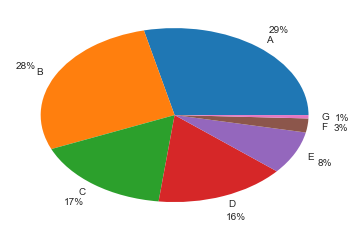

In [138]:
plt.pie(data['grade'].value_counts(), labels=data['grade'].unique(), autopct='%1.0f%%', pctdistance=1.25, labeldistance=1.1)

plt.show()

Repeating this analysis at the more granular subgrade:

In [76]:
subgrades = [c + str(i) for c in grades for i in range(1,6) ]
subgrades_mapping = {grade: i for i, grade in enumerate(subgrades)}
subgrades_key = data['sub_grade'].map(subgrades_mapping)
data = data.iloc[subgrades_key.argsort()]

completed_loan_mask = (~data['loan_status'].str.contains('Current|Issued|Grace|Late'))
default_mask = (data['default'] == 1) & completed_loan_mask
paid_mask = (data['default'] == 0) & completed_loan_mask

In [78]:
plt.figure(figsize=(12,5))

ind = list(range(len(subgrades)))
count_paid = data[paid_mask].groupby('sub_grade').size()
count_default = data[default_mask].groupby('sub_grade').size()

plt.bar(ind, count_paid, label='Paid')
plt.bar(ind, count_default, bottom=count_paid, label='Default')

plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.title('Loan Count per Subgrade')
plt.xticks(ind, subgrades)
plt.legend()

my_func.saveplot(plt, 'EDA_StackedBarChart_LoanCount_per_Subgrade')
plt.close()

![](../reports/figures/EDA_StackedBarChart_LoanCount_per_Subgrade.png)

In [80]:
plt.figure(figsize=(12,5))

data[completed_loan_mask].groupby('sub_grade')['default'].mean().plot.bar(rot=0)
sns.barplot(x='sub_grade', y='default', data=data[completed_loan_mask], ci=None)

plt.xlabel('Subgrade')
plt.ylabel('Fraction Default')
plt.title('Fraction of Default Loans per Grade')

my_func.saveplot(plt, 'EDA_BarChart_Subgrade_DefaultRate')
plt.close()

![](../reports/figures/EDA_BarChart_Subgrade_DefaultRate.png)

Again, we can observe a clear upward trend in the default rate with decreasing grade. It is worth noting that the G subgrades seem to taper off from this trend and show more variation between grade sub levels. However, this is likely a result of G loans having a much more limited set of data in comparison with the other grades.

Listed on Lending Club's website is a set of interest rates for each grade/subgrade level. Higher risk loans (i.e. lower grade) have higher interest rates, so we will see if this expected correlation proves true and if there is consistency in the interest rate for a given grade/subgrade:

In [82]:
plt.figure(figsize=(15,7))

ax = sns.boxplot(data['sub_grade'], data['int_rate'])

plt.title('Loan Interest Rate per Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('Loan Interest Rate')

my_func.saveplot(plt, 'EDA_Boxplot_InterestRate_per_Subgrade')
plt.close()

![](../reports/figures/EDA_Boxplot_InterestRate_per_Subgrade.png)

Surprisingly there is actually a fair amount of variaton in interest rate at each loan subgrade. The upward trend in interest rate with decreasing loan grades is still evident, but there are are a number of lower interest exceptions the lower the grade. This indicates that there are other likely influencers on the interest rate selected besides the loan grade (e.g. loan amount), or vice versa.

It is also very likely that the given interest rates for each grade/subgrade vary over time:

In [84]:
plt.figure(figsize=(12,5))

for x in data.groupby(['grade',data['issue_d'].map(lambda x: x.year)])['int_rate'].mean().unstack().iterrows():
    plt.plot(x[1].index, x[1].values, label=x[0])

plt.title('Interest Rates 2007-2015 by Loan Grade')
plt.xlabel('Mean Interest Rate')
plt.ylabel('Year')
plt.legend()

my_func.saveplot(plt, 'EDA_LinePlot_InterestRate_vs_Time')
plt.close()

![](../reports/figures/EDA_LinePlot_InterestRate_vs_Time.png)

In [204]:
data[data['issue_d'].map(lambda x: x.year)==2015].groupby(data['issue_d'].map(lambda x: x.month)).size()

issue_d
1     35107
2     23770
3     25400
4     35427
5     31913
6     28485
7     45962
8     35886
9     28641
10    48631
11    37530
12    44342
dtype: int64

In [206]:
temp_mask = (data['issue_d'].map(lambda x: x.year) == 2015) & (data['issue_d'].map(lambda x: x.month) == 10)

data[temp_mask].groupby('sub_grade').size()

sub_grade
A1    1710
A2    1379
A3    1229
A4    1790
A5    2638
B1    2990
B2    2944
B3    3031
B4    2942
B5    2784
C1    3021
C2    2913
C3    2925
C4    2869
C5    2150
D1    1797
D2    1391
D3    1210
D4    1168
D5    1050
E1     946
E2     854
E3     723
E4     568
E5     453
F1     343
F2     235
F3     162
F4     119
F5      90
G1      92
G2      48
G3      40
G4      15
G5      12
dtype: int64

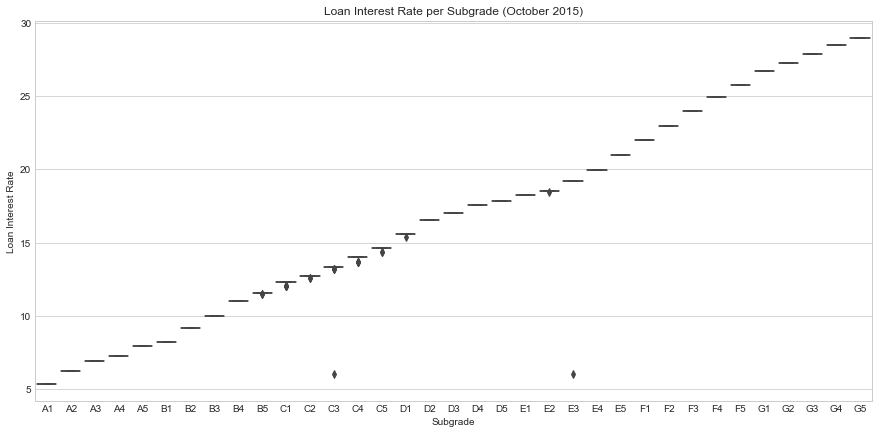

In [85]:
plt.figure(figsize=(15,7))

temp_mask = (data['issue_d'].map(lambda x: x.year) == 2015) & (data['issue_d'].map(lambda x: x.month) == 10)

sns.boxplot(data[temp_mask]['sub_grade'], data[temp_mask]['int_rate'])

plt.title('Loan Interest Rate per Subgrade (October 2015)')
plt.xlabel('Subgrade')
plt.ylabel('Loan Interest Rate')

plt.show()

As one can see, reducing the focus to just one year & month (e.g. October 2015) shows a much more consistent interest rate for each subgrade. Consequently, comparing loans over the years via interest rate may require some adjustments for the variation in interest rates over the months and years.

Moving on from interest rate, one would presume the debt to income (DTI) ratio to be one of the key influencers in assigning loan grades. A higher DTI would likely be considered higher risk, since unexpected changes in income would have a greater impact on a borrowers ability to pay all existing debt. Evaluating the distribution of DTI across each grade yields the following:

In [87]:
plt.figure(figsize=(15,7))

grades = list('ABCDEFG')
grades_mapping = {grade: i for i, grade in enumerate(grades)}
grades_key = data['grade'].map(grades_mapping)
data = data.iloc[grades_key.argsort()]

completed_loan_mask = (~data['loan_status'].str.contains('Current|Issued|Grace|Late'))

sns.violinplot(data[completed_loan_mask]['grade'],data[completed_loan_mask]['dti'], hue=data[completed_loan_mask]['default'], split=True)

plt.title('Debt to Income (DTI) Ratio per Grade')
plt.xlabel('Grade')
plt.ylabel('DTI')
plt.ylim(top=50)

my_func.saveplot(plt, 'EDA_Violin_DTI_per_Grade')
plt.close()

![](../reports/figures/EDA_Violin_DTI_per_Grade.png)

Surprisingly, while there is a gradual shift upward in the distribution of DTI with decreasing grade at first glance it does not appear to be quite as drastic as one might expect - all grades share a similar range in DTI. There is, however, a notable difference in DTI distribution at each grade between loans that defaulted and those that did not: those that defaulted are more likely to have a higher DTI, suggesting that this may be a useful feature for our modelling.

To give some numerical context to the figure above:

In [220]:
data[completed_loan_mask].groupby(['grade', 'default'])['dti'].describe()

count       mean       std  min      25%     50%      75%  \
grade default                                                                
A     0        39769.0  14.013161  7.296158  0.0   8.4700  13.530  19.1200   
      1         2672.0  15.870591  7.629693  0.0  10.1375  15.635  21.3450   
B     0        66815.0  15.928706  7.454757  0.0  10.3600  15.560  21.1500   
      1         9802.0  17.334958  7.634439  0.0  11.6900  17.310  22.9175   
C     0        53159.0  16.761569  7.678052  0.0  11.1000  16.420  22.0600   
      1        13150.0  18.533308  7.807768  0.0  12.8100  18.470  24.0700   
D     0        30514.0  17.252816  7.960009  0.0  11.3600  16.900  22.7700   
      1        10995.0  18.828869  8.045869  0.0  12.9150  18.810  24.5400   
E     0        13306.0  17.544463  8.063260  0.0  11.7000  17.310  22.9575   
      1         6617.0  19.452417  8.228009  0.0  13.5700  19.420  25.2100   
F     0         4880.0  17.540238  7.831179  0.0  11.9975  17.435  22.8325   
      1         3106.0  19.126800  8.133383  0.0  13.2225  19.080  24.9000   
G     0         1268.0  17.688793  7.902657  0.0  11.9575  17.435  23.3825   
      1          886.0  18.938431  7.958466  0.0  13.1750  19.255  24.7475   

                 max  
grade default         
A     0        39.70  
      1        39.91  
B     0        39.90  
      1        39.69  
C     0        39.96  
      1        39.78  
D     0        39.99  
      1        39.92  
E     0        57.14  
      1        39.98  
F     0        39.52  
      1        39.95  
G     0        39.72  
      1        39.69

Again, one can observe that not only does mean DTI increase with decreasing grade, but the mean DTI is consistently higher for defaulted loans in each grade category. All grades, with the expection of 'E', also share the same range of approx. 0-40 and similar standard deviations.

We can repeat the analysis above with some alternative ratio calculations, which may provide additional insight. Calculating the ratio of the loan amount (instead of total debt) to the listed income yeilds the following:

In [88]:
plt.figure(figsize=(15,7))

grades = list('ABCDEFG')
grades_mapping = {grade: i for i, grade in enumerate(grades)}
grades_key = data['grade'].map(grades_mapping)
data = data.iloc[grades_key.argsort()]

completed_loan_mask = (~data['loan_status'].str.contains('Current|Issued|Grace|Late'))

# Loan to Income ratio
lti = data['loan_amnt'] / data['annual_inc']

ax = sns.violinplot(data[completed_loan_mask]['grade'], lti[completed_loan_mask], hue=data[completed_loan_mask]['default'], split=True, bw=0.3)

plt.ylim(top=0.8)
plt.title('Loan to Income (LTI) Ratio per Grade')
plt.xlabel('Grade')
plt.ylabel('LTI')

my_func.saveplot(plt, 'EDA_Violin_LTI_per_Grade')
plt.close()

![](../reports/figures/EDA_Violin_LTI_per_Grade.png)

In [224]:
data['lti'] = data['loan_amnt'] / data['annual_inc']
data[completed_loan_mask].groupby(['grade', 'default'])['lti'].describe()

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count      mean       std       min       25%       50%  \
grade default                                                              
A     0        39765.0  0.173769  0.096274  0.000746  0.100000  0.157895   
      1         2672.0  0.198232  0.106018  0.013333  0.116667  0.184446   
B     0        66815.0  0.192903  0.101300  0.002076  0.116466  0.178431   
      1         9802.0  0.221965  0.110877  0.004611  0.136364  0.208333   
C     0        53159.0  0.204781  0.107885  0.000833  0.120743  0.190972   
      1        13150.0  0.236517  0.113492  0.000919  0.146969  0.229167   
D     0        30514.0  0.215539  0.113164  0.005217  0.125843  0.202532   
      1        10995.0  0.246856  0.115821  0.009709  0.153846  0.244231   
E     0        13306.0  0.245571  0.117332  0.004032  0.154497  0.243080   
      1         6617.0  0.274778  0.116699  0.005208  0.184783  0.282000   
F     0         4880.0  0.257428  0.115249  0.008571  0.173611  0.261536   
      1         3106.0  0.289898  0.111537  0.019034  0.210893  0.299490   
G     0         1268.0  0.263353  0.110521  0.011765  0.187588  0.272526   
      1          886.0  0.281004  0.102081  0.021361  0.208773  0.296699   

                    75%       max  
grade default                      
A     0        0.230362  0.777083  
      1        0.262247  0.589623  
B     0        0.255319  0.830000  
      1        0.300000  0.819672  
C     0        0.276923  0.777778  
      1        0.320513  1.120000  
D     0        0.295652  1.337500  
      1        0.336443  0.758333  
E     0        0.335727  0.800000  
      1        0.360825  0.666667  
F     0        0.342857  0.773810  
      1        0.371076  0.704310  
G     0        0.339000  0.949367  
      1        0.352941  0.603448

LTI seems to show a more significant increase in mean value with decreasing grade versus the original DTI feature, along with its percentile values. It is worth noting, however, that the maximum LTI for each category is quite sporadic, so there may be a number of outliers generated via this new ratio due to unusual income - loan amount combinations. 

### Evaluating DTI and Utilization

The Debt to Income ratio (DTI) is likely to be an important factor for determining the risk associated with a loan, so we will take some time to further explore this attribute in detail.

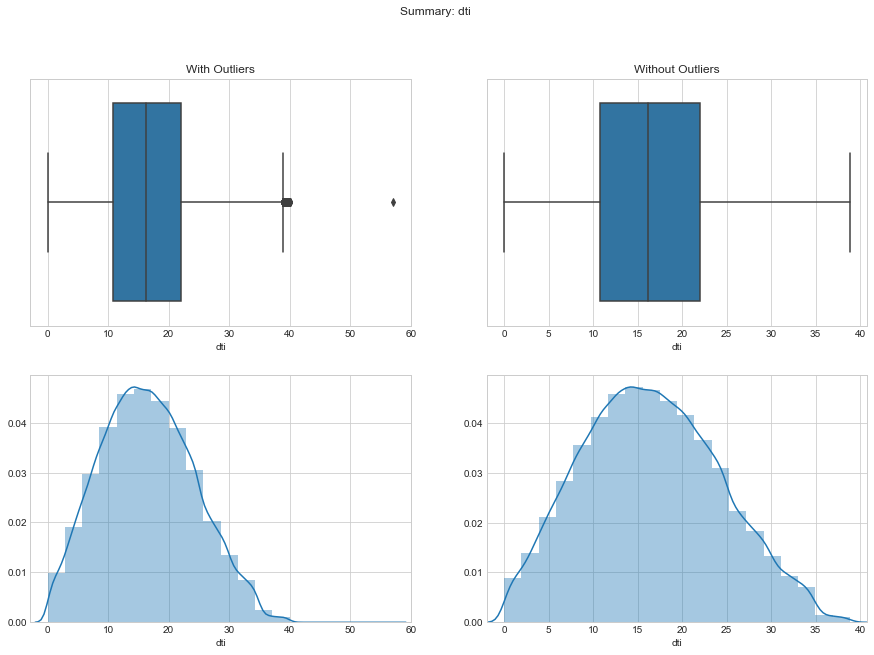

--------------------------------------------------
# High Outliers = 293
# Low Outliers = 0
--------------------------------------------------
w/ Outliers:
skew = 0.208, kurtosis = -0.492
w/o Outliers:
skew = 0.192, kurtosis = -0.531
--------------------------------------------------
Stat     w/ Outliers   w/o Outliers
count      256939.00      256646.00
mean           16.53          16.51
std             7.79           7.76
min             0.00           0.00
5%              4.21           4.20
25%            10.74          10.74
50%            16.20          16.19
75%            21.99          21.97
95%            30.00          29.92
max            57.14          38.86
--------------------------------------------------


In [93]:
# Focus on completed loans
completed_loan_mask = ~data['loan_status'].str.contains('Current|Issued|Grace|Late')

dti_summary = attr_summary(data[completed_loan_mask]['dti'])

In [94]:
my_func.saveplot(dti_summary, 'EDA_AttrSummary_DTI')

Unlike income, for at the least the set of completed loans that we be working with we do not have any worrisome outliers. However, if for whatever reason we use the current loan data the presence of extreme outliers for DTI should be taken into account (and most likey removed).

Having already compared DTI and similar ratios to loan grades, we will take a look at DTI on its own and how it compares for default vs. non-defaulted loans:

In [95]:
plt.figure(figsize=(12,7))

ax = sns.boxplot(data[completed_loan_mask]['default'],data[completed_loan_mask]['dti'], showfliers=True)

plt.title('DTI vs Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('DTI')

my_func.saveplot(plt, 'EDA_Boxplot_DTI_vs_Default')
plt.close()

![](../reports/figures/EDA_Boxplot_DTI_vs_Default.png)

In [242]:
data[completed_loan_mask].groupby('default')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,209711.0,16.119893,7.695939,0.0,10.40,15.74,21.46,57.14
1,47228.0,18.378162,7.955576,0.0,12.56,18.33,24.07,39.98


Whilst there is an increase in mean/median DTI for defaulted loans, we see that both default and non-default loans share a very similar spread and range of DTI. Thus, it is unlikely that DTI alone will provide as strong an indication of default likelihood as one might have anticpated. Also worth noting is that, with one exception, the values seem to be capped at a DTI of approx. 40, so this may be the most appropriate threshold to set when filtering outliers.

Splitting this visualization furhter into income quartiles yields the following:

In [96]:
plt.figure(figsize=(15,7))

q = 0.25
q_range = np.arange(q, 1+q, q)
quantiles = data['annual_inc'].quantile(q_range)
income_q4 = data['annual_inc'].apply(lambda x: get_qbin(x, quantiles))

ax = sns.boxplot(income_q4[completed_loan_mask], data[completed_loan_mask]['dti'], hue=data[completed_loan_mask]['default'])

plt.title('DTI vs Income Bracket')
plt.xlabel('Income Quantile (4th)')
plt.ylabel('DTI')

my_func.saveplot(plt, 'EDA_Boxplot_DTI_per_IncomeBracket')
plt.close()

![](../reports/figures/EDA_Boxplot_DTI_per_IncomeBracket.png)

There is a gradual downard trend in median DTI with increasing income, but we still have the same range in DTI across all categories.

Taking a look at correlations across all numerical features, we will see what relationships may be worth investigating further.

In [245]:
data[completed_loan_mask].corr()['dti'].sort_values(ascending=False)

dti                            1.000000
total_bal_il                   0.373147
open_acc                       0.310869
open_il_6m                     0.308475
all_util                       0.305780
total_cu_tl                    0.290403
open_il_24m                    0.278439
lti                            0.236392
total_acc                      0.234794
revol_util                     0.220175
open_rv_24m                    0.193171
int_rate                       0.172709
open_il_12m                    0.167043
inq_fi                         0.159620
grade_value                    0.149446
revol_bal                      0.147286
max_bal_bc                     0.134597
member_id                      0.117864
id                             0.117139
default_harsh                  0.112233
default                        0.112233
mths_since_last_record         0.091555
open_acc_6m                    0.091033
open_rv_12m                    0.087913
funded_amnt_inv                0.062575


Based off the correlation above, the most noteworthy features (ignoring directly related columns) are those that pertain to various credit balances and utilizations and the number of accounts open, which seems logical.

In [99]:
def jointplot_filtered(data, x, y, p_high = .95, p_low = .05, title=''):
    var = 'open_acc'
    # Ignore data outside defined percentiles
    x_high = data[x].quantile(p_high)
    x_low = data[x].quantile(p_low)
    y_high = data[y].quantile(p_high)
    y_low = data[y].quantile(p_low)

    mask = (data[x] <= x_high) & (data[x] >= x_low) & (data[y] <= y_high) & (data[y] >= y_low)

    sns.jointplot(data[mask][x], data[mask][y], kind='hex',gridsize=15)
    plt.suptitle(title)
    return plt

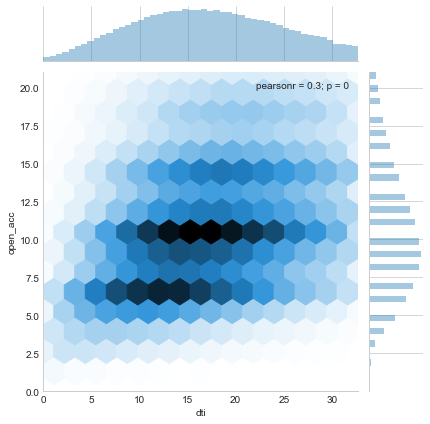

In [101]:
jp_dti_opacc = jointplot_filtered(data, 'dti', 'open_acc', p_low=0)
plt.show()

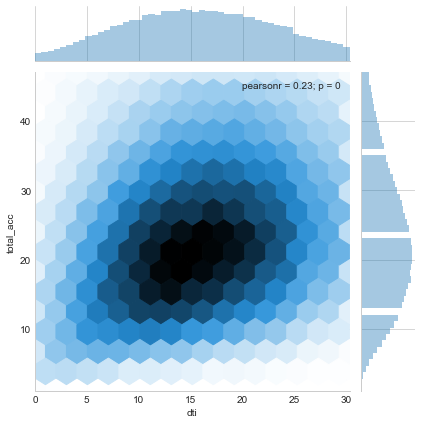

In [110]:
jointplot_filtered(data, 'dti', 'total_acc', p_low=0)

There still is a spread of DTI across each interval of open/total accounts, but the rough positive correlation is still visibile.

With the correlation between interest rate, grade, income, etc. already esablished, it is of little surprise that interest rate and DTI have somewhat of a correlation through association. However it is clearly not the deciding factor for a given loans interest rate, as seen by the spread of DTI across the various rates:

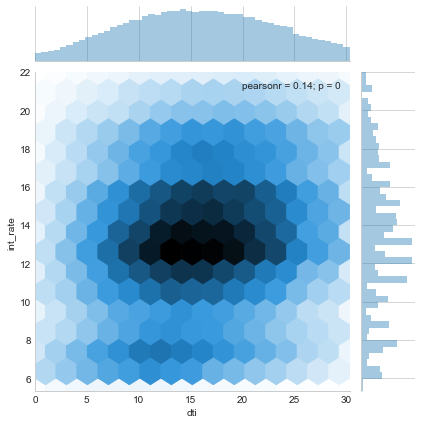

In [44]:
jointplot_filtered(data, 'dti', 'int_rate', p_low=0)

As for DTI and revolving balance/utilization, whilst one would expect a strong correlaton between the two since more debt (higher debt) requires a higher utilization and balance, it becomes clear that dont have pull picture of utilization due to missing installmenet debt data. 

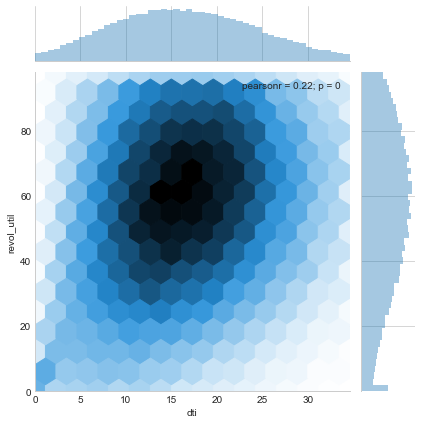

In [46]:
jointplot_filtered(data, 'dti', 'revol_util', p_low=0, p_high=.99)

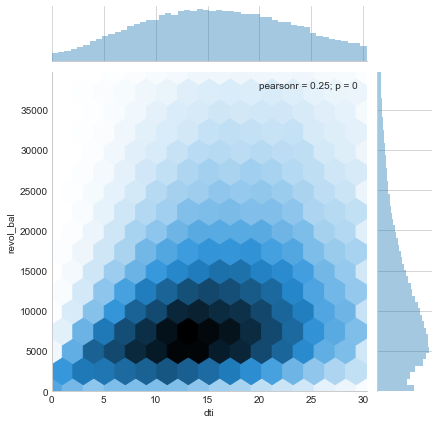

In [47]:
jointplot_filtered(data, 'dti', 'revol_bal', p_low=0)

While the rough correlations between DTI and the features above can be observed, there is nothing too astounding that stands out. Unfortunately, for some of the more correlated columns that remain, we have the issue of large portions of missing data:

In [249]:
cols = ['tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

data[cols].isnull().sum()

tot_coll_amt           70276
tot_cur_bal            70276
open_acc_6m           866007
open_il_6m            866007
open_il_12m           866007
open_il_24m           866007
mths_since_rcnt_il    866569
total_bal_il          866007
il_util               868762
open_rv_12m           866007
open_rv_24m           866007
max_bal_bc            866007
all_util              866007
total_rev_hi_lim       70276
inq_fi                866007
total_cu_tl           866007
inq_last_12m          866007
dtype: int64

These missing values were already observed in the missingno matrix at the start of this notebook, but perhaps it is now worth investigating the possible cause of these missing values. Thie first possibilty that comes to mind is possible time dependencies. Considering this dataset covers a wide range of data joined across the years 2007-2015, there may be a difference in record keeping as time progresses:

In [253]:
data[cols].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum().divide(data.groupby(data['issue_d'].map(lambda x: x.year))['issue_d'].size(), axis=0)

,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
issue_d,,,,,,,,,,,,,,,,,
2007,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2008,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2009,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2011,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012,0.519816,0.519816,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.519816,1.000000,1.000000,1.000000
2013,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
2014,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
2015,0.000000,0.000000,0.949246,0.949246,0.949246,0.949246,0.950581,0.949246,0.955789,0.949246,0.949246,0.949246,0.949246,0.000000,0.949246,0.949246,0.949246


Interestingly enough, there are in fact a few columns which appear to be only populated for more recent years: 'tot_coll_amt', 'tot_cur_bal', and 'total_rev_hi_lim' appear to be populated starting sometime in the year 2012.

As for the columns with the more severe case missing data, only a small portion of the data in 2015 appear to have values. We will break this view down further into individual months for the year 2015:

In [254]:
cols = ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

mask_2015 = data['issue_d'].map(lambda x: x.year) == 2015

data[mask_2015][cols].isnull().groupby(data['issue_d'].map(lambda x: x.month)).sum().divide(data[mask_2015].groupby(data['issue_d'].map(lambda x: x.month))['issue_d'].size(), axis=0)

,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
issue_d,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It would appear that these values are only populated for loans issued starting in December 2015 - the very last month in our dataset. Consequently, whilst it would be nice to use this apparently new feature for our modelling, given the time period of data at hand we will need to drop these columns for analysis.

As for the other columns with older years missing data, it may be best to drop those records beyond the point in 2012 in which the values are missing:

In [265]:
data[completed_loan_mask]['tot_cur_bal'].isnull().sum()

(66475, 256939)

In [266]:
data[completed_loan_mask]['tot_cur_bal'].isnull().sum() / data[completed_loan_mask].shape[0]

0.25871899555925726

In [267]:
data[completed_loan_mask].shape[0] - data[completed_loan_mask]['tot_cur_bal'].isnull().sum()

190464

Unfortunately dropping these records will reduce our subset of interest (completed loans) by approx. 25%. Considering some of the concerns raised thus far with time sensitivity of data, it may be safest to focus modelling on these more recent records, and it still leaves us with 190k records to work with.

### Evaluating Interest Rate

We already explored interest rate a bit in conjunction with grades and DTI, but we will see if there are any other noteworthy correlations to explore:

In [270]:
data.corr()['int_rate'].sort_values(ascending=False)

int_rate                       1.000000
grade_value                    0.954146
total_rec_int                  0.445679
all_util                       0.288049
dti_joint                      0.287345
revol_util                     0.269139
inq_last_12m                   0.252637
lti                            0.249617
open_il_12m                    0.245076
inq_last_6mths                 0.227650
open_acc_6m                    0.226033
open_il_24m                    0.199579
il_util                        0.183565
open_rv_12m                    0.176683
total_pymnt_inv                0.171479
inq_fi                         0.171162
open_rv_24m                    0.171105
total_pymnt                    0.170506
default_harsh                  0.170129
default                        0.148767
funded_amnt_inv                0.145205
funded_amnt                    0.145160
loan_amnt                      0.145023
installment                    0.133075
loan_p_return                  0.108719


Considering the extremely high correlation between grade and interest rate, it will probably be necessary to choose one over the other for modelling purposes. Interest rate is decided based off grade, and also fluctuates in weight depending on the time period, so grade will most likely be the feature of choice.

Regardless, it may be worth taking a look at some of the correlations for additional insight:

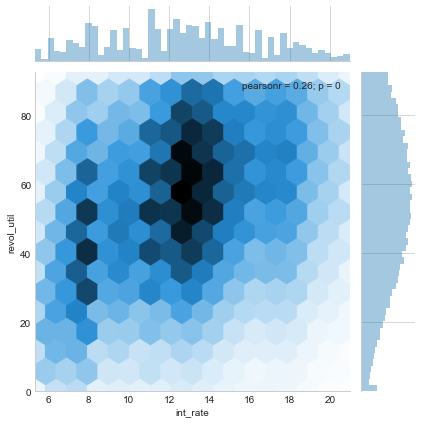

In [268]:
jointplot_filtered(data, 'int_rate', 'revol_util', p_low=0)

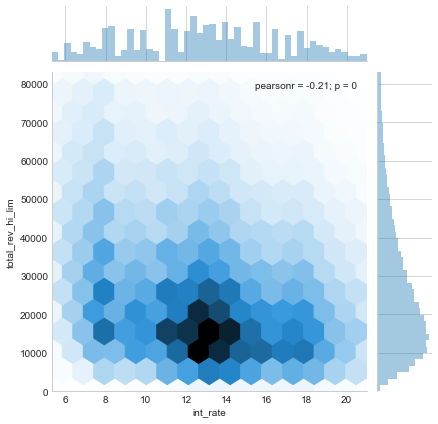

In [271]:
jointplot_filtered(data, 'int_rate', 'total_rev_hi_lim', p_low=0)

These two correlations are somewhat expected. A higher utilization would typically be associated with higher risk, and consequently receive a higher interest rate. Similarly, a higher revolving balance limit (i.e. credit limit) indicates a robust credit history which is associated with less risk and a lower interest rate. Given the close ties between grade and interesr rate, one would expect to see similar patterns between these features and grade values.

As for the funded amount:

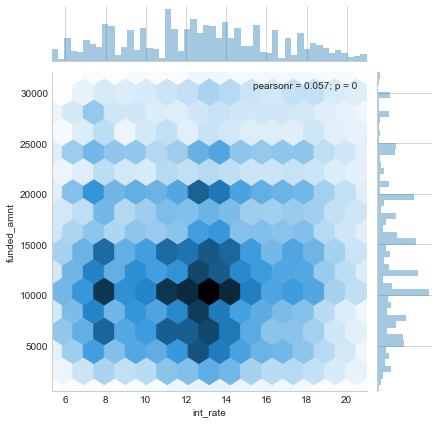

In [269]:
jointplot_filtered(data, 'int_rate', 'funded_amnt', p_low=0)

Interestingly, interest rates seem to be fairly independent of loan amounts, although we do see a concentration of loans in the \$10,000 range and 12-14\% interest.

Both the interest rate and installement amount are provided as attributes. We will see if the installement amount is actually derived from the interest rate & loan term or perhaps calculated through some other method:

In [272]:
data[['funded_amnt_inv', 'out_prncp_inv', 'term', 'int_rate', 'installment']].head()

,funded_amnt_inv,out_prncp_inv,term,int_rate,installment
594344,5000.0,4613.05,36 months,5.32,150.58
34994,9975.0,0.00,36 months,8.94,317.72
778535,10000.0,7977.02,36 months,7.89,312.86
863902,10000.0,7178.40,36 months,7.49,311.02
737797,15000.0,12353.60,36 months,7.89,469.29


In [273]:
# monthly installement = p (r(1+r)^n)/((1+r)^n-1)

# Monthly interest rate
r = data['int_rate'] / 100 / 12

# Number of installments
n = data['term'].apply(lambda x: int(x[:3]))

In [274]:
# Calculate installment using loan_amnt

# Principal amount
p = data['loan_amnt']

# Installement calculation
inst_custom = p * (r*(1+r)**n)/((1+r)**n -1)

# Mean % difference from actual value
(abs(data['installment'] - inst_custom) / data['installment']).mean()

0.0012512061303530215

In [275]:
# Calculate installment using loan_amnt

# Principal amount
p = data['funded_amnt']

# Installement calculation
inst_custom = p * (r*(1+r)**n)/((1+r)**n -1)

# Mean % difference from actual value
(abs(data['installment'] - inst_custom) / data['installment']).mean()

3.176517028706663e-05

In [276]:
# Calculate installment using loan_amnt

# Principal amount
p = data['funded_amnt_inv']

# Installement calculation
inst_custom = p * (r*(1+r)**n)/((1+r)**n -1)

# Mean % difference from actual value
(abs(data['installment'] - inst_custom) / data['installment']).mean()

0.0036008925515301177

It would appear that the funded_amnt is used to calculate the installment amount for a loan. This further justifies the use of the funded amount over the loan amount for analysis.

### Evaluating Borrower Info

There are a number of categorical features with information about the borrower/applicant, such as Home Ownership, Employment Length, Income Verification, and the Application Type. We will see if there are any noticeable trends between categories for the number of defaulted loans and the loan return.

In [281]:
# Home ownership values
data['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

It would appear there are a few stray records with values of OTHER, NONE, or ANY. It may be best to merge these into a single other category since there is little to be gained from these individually given their relative size.

In [285]:
data['home_ownership_merged'] = data['home_ownership'].apply(lambda x: 'OTHER' if x in ['OTHER', 'ANY', 'NONE'] else x)

In [298]:
# Default rate per home ownership type
data[completed_loan_mask].groupby('home_ownership_merged')['default'].mean()

home_ownership_merged
MORTGAGE    0.163699
OTHER       0.201754
OWN         0.187775
RENT        0.206564
Name: default, dtype: float64

In [299]:
data['verification_status'].value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [303]:
data['verification_status_simple'] = data['verification_status'].apply(lambda x: 0 if x == 'Not Verified' else 1)

In [305]:
# Default rate per home ownership type
data[completed_loan_mask].groupby('verification_status_simple')['default'].mean()

verification_status_simple
0    0.147402
1    0.202832
Name: default, dtype: float64

In [ ]:
### emp length

In [306]:
data['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [307]:
data[completed_loan_mask].groupby('emp_length')['default'].mean()

emp_length
1 year       0.182091
10+ years    0.175797
2 years      0.175113
3 years      0.178795
4 years      0.175917
5 years      0.181888
6 years      0.187233
7 years      0.189745
8 years      0.187796
9 years      0.190452
< 1 year     0.188931
n/a          0.261048
Name: default, dtype: float64

In [55]:
def emp_length_val(emp_length):
    s = re.search('[0-9]{1,2}', emp_length)
    if s:
        if emp_length[0] == '<':
            val = 0
        else:
            val = int(s.group(0))
    else:
        val = -1
    return val

emp_lengths = data['emp_length'].apply(emp_length_val)
data = data.iloc[emp_lengths.argsort()]

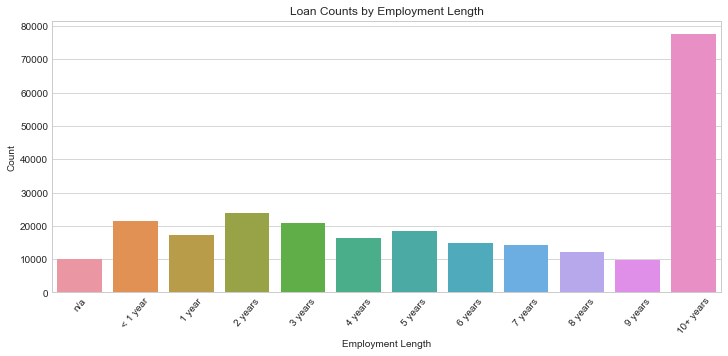

In [57]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data[~data['loan_status'].str.contains('Current|Grace|Issued|Late')]['emp_length'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.xlabel
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Loan Counts by Employment Length')

plt.show()

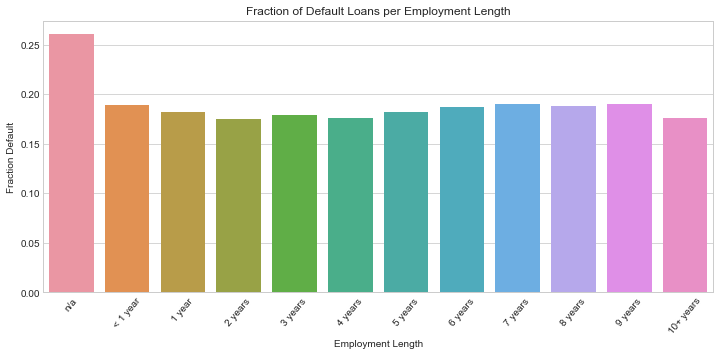

In [59]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x='emp_length', y='default', data=data[~data['loan_status'].str.contains('Current|Grace|Issued|Late')], ci=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.xlabel('Employment Length')
plt.ylabel('Fraction Default')
plt.title('Fraction of Default Loans per Employment Length')

plt.show()

### Evaluating Loan Info

In [13]:
completed_loan_mask = (~data['loan_status'].str.contains('Current|Issued|Grace|Late'))
default_mask = (data['default'] == 1) & completed_loan_mask
paid_mask = (data['default'] == 0) & completed_loan_mask

For general loan info, the main attibute of potential interest are the loan purpose, the term, and the application type.

Beggining with the loan purpose:

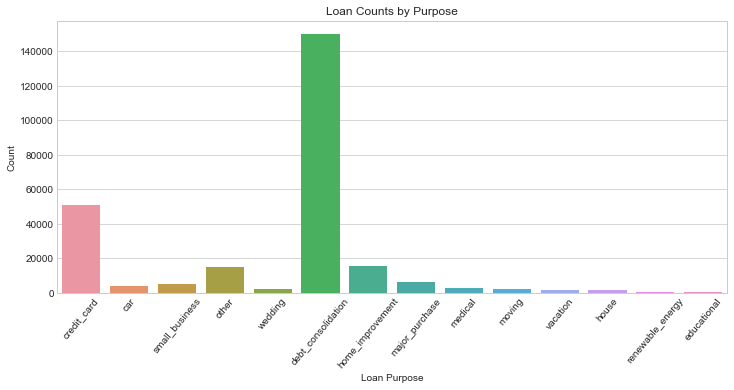

In [27]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data[completed_loan_mask]['purpose'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.xlabel
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Counts by Purpose')

plt.show()

The majority of loans are clearly focused in debt consolidation and credit card debt.

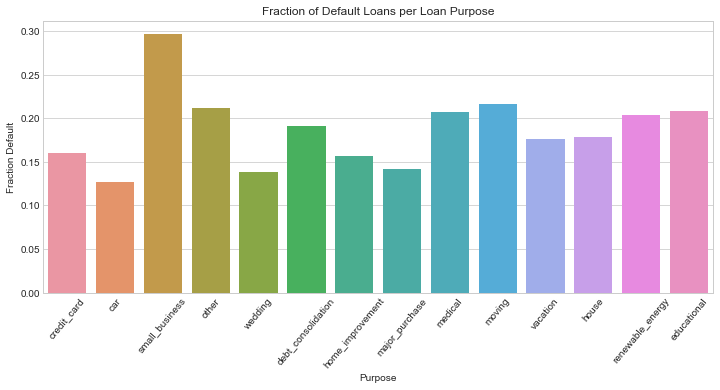

In [44]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x='purpose', y='default', data=data[completed_loan_mask], ci=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.xlabel('Purpose')
plt.ylabel('Fraction Default')
plt.title('Fraction of Default Loans per Loan Purpose')

plt.show()

The default rate seems to be fairly consistent across most loan purposes, but small business loans appear to be signficantly higher risk than the rest. Car, Wedding, and Major Purchase loans on the other hand, appear to have the lowest rate of defaults.

In [ ]:
### term

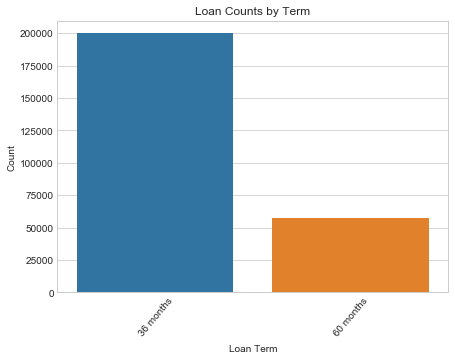

In [102]:
plt.figure(figsize=(7,5))

ax = sns.countplot(data[completed_loan_mask]['term'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.xlabel
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Loan Counts by Term')

plt.show()

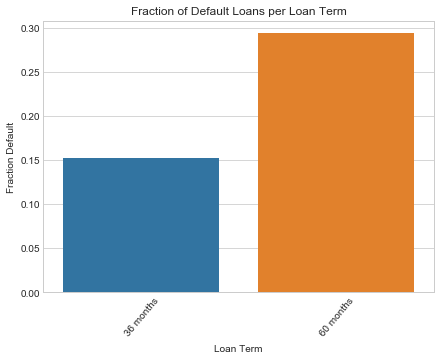

In [103]:
plt.figure(figsize=(7,5))

ax = sns.barplot(x='term', y='default', data=data[completed_loan_mask], ci=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.xlabel('Loan Term')
plt.ylabel('Fraction Default')
plt.title('Fraction of Default Loans per Loan Term')

plt.show()

60 month term loans appear to carry much higher risk that 36 month terms, which is somewhat intuitive given longer timelines allow for more uncertainty.

Exploring application type:

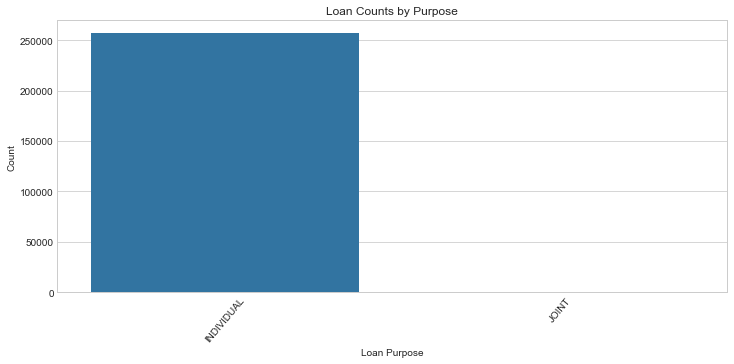

In [47]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data[completed_loan_mask]['application_type'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.xlabel
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Counts by Purpose')

plt.show()

In [48]:
data[completed_loan_mask]['application_type'].value_counts()

INDIVIDUAL    256938
JOINT              1
Name: application_type, dtype: int64

Based off this distribution of data, the application type column is off little use and should be discarded.